# Analisis Data

### Latarbelakang
##### Pemilihan presiden merupakan kegiatan 5 tahun sekali sebagai momen perwujudan demokrasi di Negara Kesatuan Republik Indonesia.  Kandidat calon presiden pastinya mendapat berbagai komentar atau opini dari masyarakat yang selalu ramai diperbincangkan di dunia nyata maupun maya, khusunya di media sosial Twitter. Hal ini mendorong peneliti untuk menganalisa data tweet yang terkumpul untuk mengetahui sentimen masyrakat baik sentimen negatif, sentimen positif dan sentiment netral pada PEMILU 2019. 
##### Oleh karena itu, dengan diketahuinya sentimen masyarakat terhadap pemilu 2019 yang telah dilakukan, sentimen ini akan digunakan sebagai tolak ukur dalam PEMILU 2024 yang akan datang untuk mengetahui penilaian masyarakat terhadap kandidat calon presiden


### Rumusan Masalah
###### 1. Berapa total atau perbandingan tweet yang mengandung kata-kata kasar dan ujaran kebencian dari semua tweet yang ada?
###### 2. Kepada siapa tweet ujaran kebencian diarahkan?
###### 3. Topik apa yang paling sering dibicarakan dan berapa tingkat ujaran kebencian dalam tweet?

In [2]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from collections import Counter

### Cek Data

In [3]:
#cek data abusive
abusive = pd.read_csv("abusive.csv")
print("Shape: ", abusive.shape)
abusive.head(10)

Shape:  (125, 1)


,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
5,anjir
6,babi
7,bacot
8,bajingan
9,banci


In [4]:
#cek data kamus alay
kamusalay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', header=None)
kamusalay = kamusalay.rename(columns={0: 'original', 
                                      1: 'replacement'})
print("Shape: ", kamusalay.shape, type(kamusalay))
kamusalay.head()

Shape:  (15167, 2) <class 'pandas.core.frame.DataFrame'>


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [5]:
#Cek data.csv atau data_tweet

data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [6]:
#Head data.csv atau data_tweet

data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0


### Info data tweet

In [7]:
#info data.csv atau data_tweet

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [8]:
# cek panjang data.csv atau data_tweet

len(data)

13169

In [9]:
data.shape

(13169, 13)

In [10]:
#Cek Missing Value data.csv atau data_tweet

data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [11]:
# Cek Duplikat Data

data.duplicated().sum()

125

In [12]:
# Remove duplicated data.csv atau data.tweet

data = data.drop_duplicates()

In [13]:
# Cek Sanitasi data csv atau data.tweet

data.duplicated().sum()

0

### Tweet berisi Hate Speech and Abusive Words

In [14]:
# buat kolom baru dengan tipe tweet baru

def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['Abusive'] == 0:
        return 'Hate Speech'
    elif x['HS'] == 0 and x['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'None'

data['Type'] = data.apply(tweet, axis=1)

In [15]:
# Dataset data_tweet
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None


In [16]:
# Klasifikasi data_tweet

data['Type'].value_counts()

None                     5783
Hate Speech & Abusive    3262
Hate Speech              2256
Abusive                  1743
Name: Type, dtype: int64

In [17]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

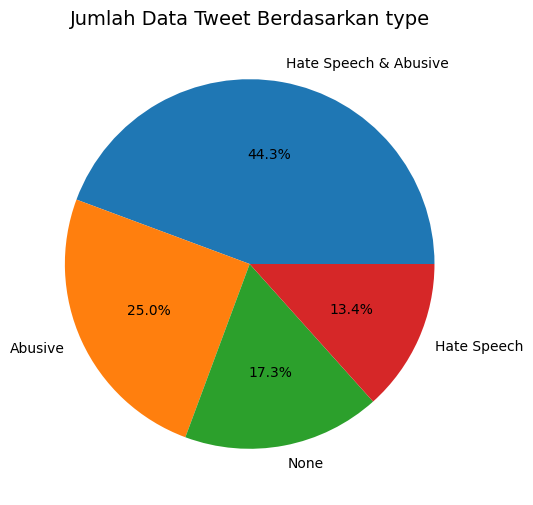

In [18]:
#Visualisasi dengan matplotlib

plt.figure(figsize=(8,6))
plt.title('Jumlah Data Tweet Berdasarkan type', fontsize=14)
plt.pie(data['Type'].value_counts(), labels=data['Type'].unique(), autopct='%1.1f%%')
plt.show()

### Target Hate Speech Tweet

In [19]:
# Membuat Kolom baru untuk negative tweet target

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

data['Target'] = data.apply(target, axis=1)

In [20]:
#Head Data set

data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,None


In [21]:
# Klasifikasi Tweet target 

filter = data['Target'] == 'None'
data[~filter]['Target'].value_counts()


Individual    3540
Group         1978
Name: Target, dtype: int64

<Axes: ylabel='Target'>

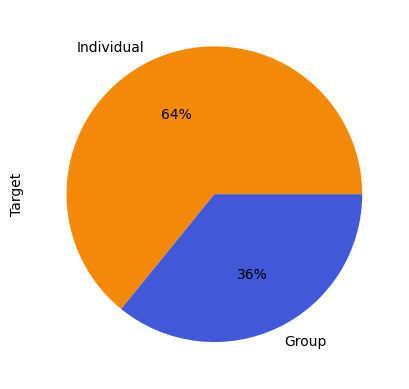

In [22]:
data[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#F28907','#4158D9'])

### Topik dan Level Negative Tweets yang paling banyak dibahas

In [23]:
# Membuat Data Frame baru untuk Hate Speech Tweet Level

df_level = data[(data['HS_Weak'] == 1) | (data['HS_Moderate']==1) | (data['HS_Strong']==1)].reset_index()

In [24]:
#Membuat Kolom baru negative tweet level

def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df_level['Level'] = df_level.apply(level, axis = 1)

In [25]:
# Select interesting column

df_level = pd.DataFrame(df_level, columns=['index', 'Level'])

# Take a look at dataframe

df_level.head()

,index,Level
0,0,Weak
1,4,Moderate
2,5,Moderate
3,10,Weak
4,11,Weak


In [26]:
#Membuat Data Frame Baru Untuk Topik Hate Speech Tweet

df_topic = data[data['Target'] != 'None'].reset_index()

In [27]:
#Membuat kolom baru topik negative tweet

def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [28]:
# Select Interesting Column

df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])

In [29]:
# Info Data Frame

df_topic.head()

,index,Topic
0,0,Other
1,4,Religion
2,5,Other
3,10,Other
4,11,Gender


In [30]:
# join df_level and df_topic

df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Topic,Level
0,Other,Weak
1,Religion,Moderate
2,Other,Moderate
3,Other,Weak
4,Gender,Weak


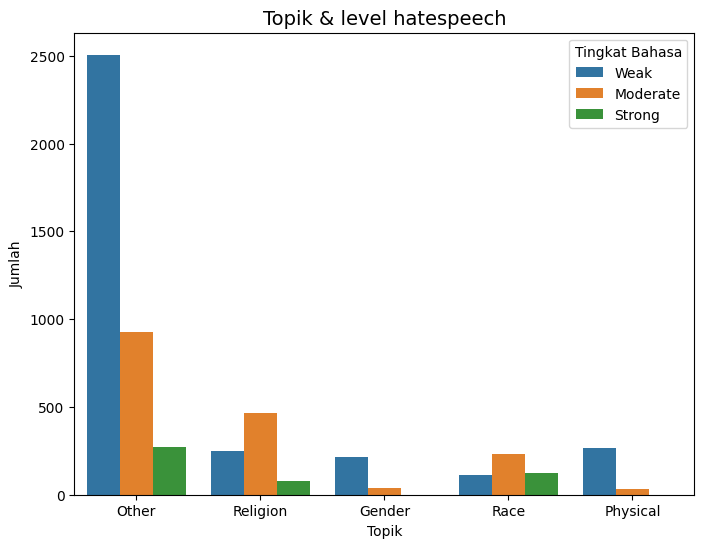

In [31]:
# Visualisasi

plt.figure(figsize=(8,6))
plt.title('Topik & level hatespeech', fontsize=14)
sns.countplot(x='Topic', hue='Level', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah')
plt.legend(title='Tingkat Bahasa', loc='upper right')
plt.show()

In [32]:
# Tweet dengan HS_Weak dlm HS_Other example

print('Weak Hate Speech in Other topic example: {}'.format(data[(data['HS_Weak'] == 1) & (data['HS_Other']==1)]['Tweet'][0]))

Weak Hate Speech in Other topic example: - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'


In [33]:
# Tweet dengan HS_Moderate dlm HS_Other example

print('Moderate Hate Speech in Other topic example: {}'.format(data[(data['HS_Moderate'] == 1) & 
                                                                    (data['HS_Other']==1)]['Tweet'][35]))

Moderate Hate Speech in Other topic example: Pegawai Guardian training lagi kek Mentang2 gue kek gembel cuman kaos sama Flat shoes nanya dijutekin bangsad emang males belinya juga kabur gua ke matahari'


In [34]:
# Tweet dengan HS_Strong in HS_Other example

print('Strong Hate Speech in Other topic example: {}'.format(data[(data['HS_Strong'] == 1) & 
                                                                  (data['HS_Other']==1)]['Tweet'][6590]))

Strong Hate Speech in Other topic example: Yup... Negara ini sangat tak pantas dipimpin seorang yg tak faham mengelola Negara dgn benar lengserkan jokowi


# Kesimpulan

Dari hasil analisis sentiment, diperoleh bahwa masih banyak masyarakat yang memberikan sentimen negatif pada PEMILU 2019 yang ditujukan ke salah satu pihak tertentu. Dan topik yang paling banyak dibahas tentang agama. Informasi ini tentu berguna pada PEMILU 2024 dimana kandidat calon presiden perlu mempersiapkan strategi untuk menarik simpati masyarakat, salah satunya dari segi agama 


## Cleansing Data

#### Setelah melakukan analisis "Data_Tweet" kita menemukan 56% tweet yang bersifat negatif dengan abusive 13%. Oleh karna itu kita akan melakukan cleansing data dan membangun sebuah algoritma untuk menangani masalah tersebut Algoritma akan diterapkan di API

In [35]:
#Load semua data yang diperlukan

abusive = pd.read_csv("abusive.csv")

kamusalay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1')

data_tweet = pd.read_csv('data.csv', encoding ='ISO-8859-1')

In [36]:
#Head of data tweet
data_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [37]:
#Terapkan fungsi regex untuk cleansing
def lowercase(text):
    return text.lower()

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_unnecessary_char(text):
    text = re.sub('\\+n', ' ', text)
    text = re.sub('\n'," ",text) # Remove every '\n'
    
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('RT',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('USER', ' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove 
    text = re.sub(':', ' ', text)
    text = re.sub(';', ' ', text)
    text = re.sub('\\+n', ' ', text)
    text = re.sub('\n'," ",text) # Remove every '\n'
    text = re.sub('\\+', ' ', text)
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def remove_emoticon_byte(text):
    text = text.replace("\\", " ")
    text = re.sub('x..', ' ', text)
    text = re.sub(' n ', ' ', text)
    text = re.sub('\\+', ' ', text)
    text = re.sub('  +', ' ', text)
    return text

def remove_early_space(text):
    if text[0] == ' ':
        return text[1:]
    else:
        return text

In [38]:
def preprocess(text):
    text = lowercase(text) 
    text = remove_nonaplhanumeric(text) 
    text = remove_unnecessary_char(text) 
    
    text = remove_unnecessary_char(text)
    text = remove_emoticon_byte(text)
    text = remove_early_space(text)
    return text

In [39]:
data_tweet['Tweet'] = data_tweet['Tweet'].apply(preprocess)

In [40]:
data_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat ngasih tau elu edan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku nku tau matamu sipit tapi diliat d...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0


In [41]:
Tweet = data_tweet.Tweet.to_list()

In [42]:
Tweet_split = []
for kalimat in Tweet:
    kalimat_split = kalimat.split(" ")
    Tweet_split.append(kalimat_split)

for i in range(3):
    print(Tweet_split[i])

['disaat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'loe', 'lantas', 'remehkan', 'perhatian', 'yg', 'gue', 'kasih', 'khusus', 'ke', 'elo', 'basic', 'elo', 'cowok', 'bego', '']
['siapa', 'yang', 'telat', 'ngasih', 'tau', 'elu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'ciga', 'ifla', 'calis', 'sama', 'siapa', 'noh', 'licew', 'juga', '']
['41', 'kadang', 'aku', 'berfikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'ninggalkan', 'aku', 'sendirian', 'ketika', 'orangtuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', 'ter']


In [43]:
kamusalay = pd.read_csv('new_kamusalay.csv', encoding='latin1', header=None)
kamusalay = kamusalay.rename(columns={0: 'original', 
                                      1: 'replacement'})

kamusalay.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [44]:
#membuata dictionary dengan variabel Lalay_dict
alay_dict = dict(zip(kamusalay['original'], kamusalay['replacement']))

# Menampilkan isi dari dictionary
print(list(alay_dict.items())[:5])

[('anakjakartaasikasik', 'anak jakarta asyik asyik'), ('pakcikdahtua', 'pak cik sudah tua'), ('pakcikmudalagi', 'pak cik muda lagi'), ('t3tapjokowi', 'tetap jokowi'), ('3x', 'tiga kali')]


In [45]:
for i in range(len(Tweet)):
    words = Tweet[i].split() # Pecah kalimat menjadi kata-kata
    for j in range(len(words)):
        if words[j] in alay_dict:
            words[j] = alay_dict[words[j]]
    Tweet[i] = ' '.join(words) # Gabungkan kata-kata menjadi kalimat
Tweet[:5]

['di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego',
 'siapa yang telat memberi tau kamu edan sarap gue bergaul dengan ciga ifla calis sama siapa itu licew juga',
 '41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter',
 'aku itu aku ku tau matamu sipit tapi dilihat dari mana itu aku',
 'kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha']

In [46]:
df = pd.read_csv('abusive.csv')
abusive_list = df['ABUSIVE'].str.lower().tolist()
print(abusive_list[:10])

['alay', 'ampas', 'buta', 'keparat', 'anjing', 'anjir', 'babi', 'bacot', 'bajingan', 'banci']


In [47]:
sensor = "****"

In [48]:
Tweet_sensored = []
for word in Tweet_split:
    if isinstance(word, str) and word.lower() in abusive_list:
        Tweet_sensored.append(sensor)
    else:
        Tweet_sensored.append(word)

In [49]:
# Membuat koneksi ke database SQLite
conn = sqlite3.connect('yohana_challagedb')

# Membuat tabel tweet_cleansing jika belum ada
conn.execute('''CREATE TABLE IF NOT EXISTS tweet_cleansing
             (id INTEGER PRIMARY KEY AUTOINCREMENT,
              tweet_cleansed TEXT)''')

# Menyimpan data_tweet ke dalam tabel tweet_cleansing
data_tweet = pd.DataFrame(data_tweet, columns=['tweet_cleansed'])
data_tweet.to_sql('tweet_cleansing', conn, if_exists='append', index=False)

# Menambahkan kolom index dan mengisi nilai index
conn.execute("ALTER TABLE tweet_cleansing ADD COLUMN idx INTEGER")
data_tweet = pd.read_sql("SELECT * FROM tweet_cleansing", conn)
data_tweet['idx'] = range(1, len(data_tweet) + 1)
data_tweet.to_sql('tweet_cleansing', conn, if_exists='replace', index=False)

# Menutup koneksi ke database SQLite
conn.close()